<a href="https://www.kaggle.com/code/themeeemul/simple-heart-disease-classification-using-xgboost?scriptVersionId=133578877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Flower Image](https://images.ctfassets.net/ut7rzv8yehpf/3XoXA2geHD8KKfB4DREtUR/c2435575fe61b2e3175bbb9b2028b1e3/How_long_do_heart_attacks_last.jpeg?w=1800&h=900&fl=progressive&q=50&fm=jpg)

**Heart disease** refers to a range of cardiovascular conditions that affect the heart's functioning. It includes disorders such as coronary artery disease, heart failure, arrhythmias, valvular heart diseases, and congenital heart defects. These conditions can cause symptoms like chest pain, shortness of breath, fatigue, and irregular heart rhythms. Risk factors such as high blood pressure, high cholesterol, smoking, obesity, and a sedentary lifestyle contribute to their development. Treatment involves lifestyle changes, medication, and medical interventions to manage symptoms, improve heart health, and reduce the risk of complications. Regular medical check-ups and following medical advice are important for individuals with heart disease.

# About Dataset

This dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.

**The 11 Features are**:

Age,Sex,Chest pain type, resting bp s,cholestrol,fasting blood sugar,resting ecg, max heart rate,excerise angina, oldpeak,st slope

# Data Engineering

**Data engineering itself encompasses various tasks related to handling and processing data to make it accessible, reliable, and ready for analysis.** 

In [1]:
# The first things to do is import some libraries that needed

import pandas as pd
import numpy as np

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl
from matplotlib.ticker import NullFormatter

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print(plt.style.available)
mpl.style.use(['ggplot'])

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize,LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import  mean_squared_error,mean_absolute_error, accuracy_score,classification_report

# The model XGBoost
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# Lets read the csv file based on the location path
df = pd.read_csv('/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv')
# Take a look at first 5 rows of data
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


The next step is gonna be find the missing values, check variable type and etc

In [3]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})   
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing
0,age,int64,1190,50,0
1,sex,int64,1190,2,0
2,chest pain type,int64,1190,4,0
3,resting bp s,int64,1190,67,0
4,cholesterol,int64,1190,222,0
5,fasting blood sugar,int64,1190,2,0
6,resting ecg,int64,1190,3,0
7,max heart rate,int64,1190,119,0
8,exercise angina,int64,1190,2,0
9,oldpeak,float64,1190,53,0


Based on the table, We can conclude that the data is clean.

In [4]:
# Next step that also important is to check the redundant data or duplicate data
df.duplicated().sum()


272

In [5]:
# There is 272 duplicated values. Time to drop it
df.drop_duplicates(inplace=True)

In [6]:
# Lets see the statistical summary from the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


# Explaratory Data Analysis
 It involves analyzing and summarizing the main characteristics, patterns, and relationships present in a dataset

In [7]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

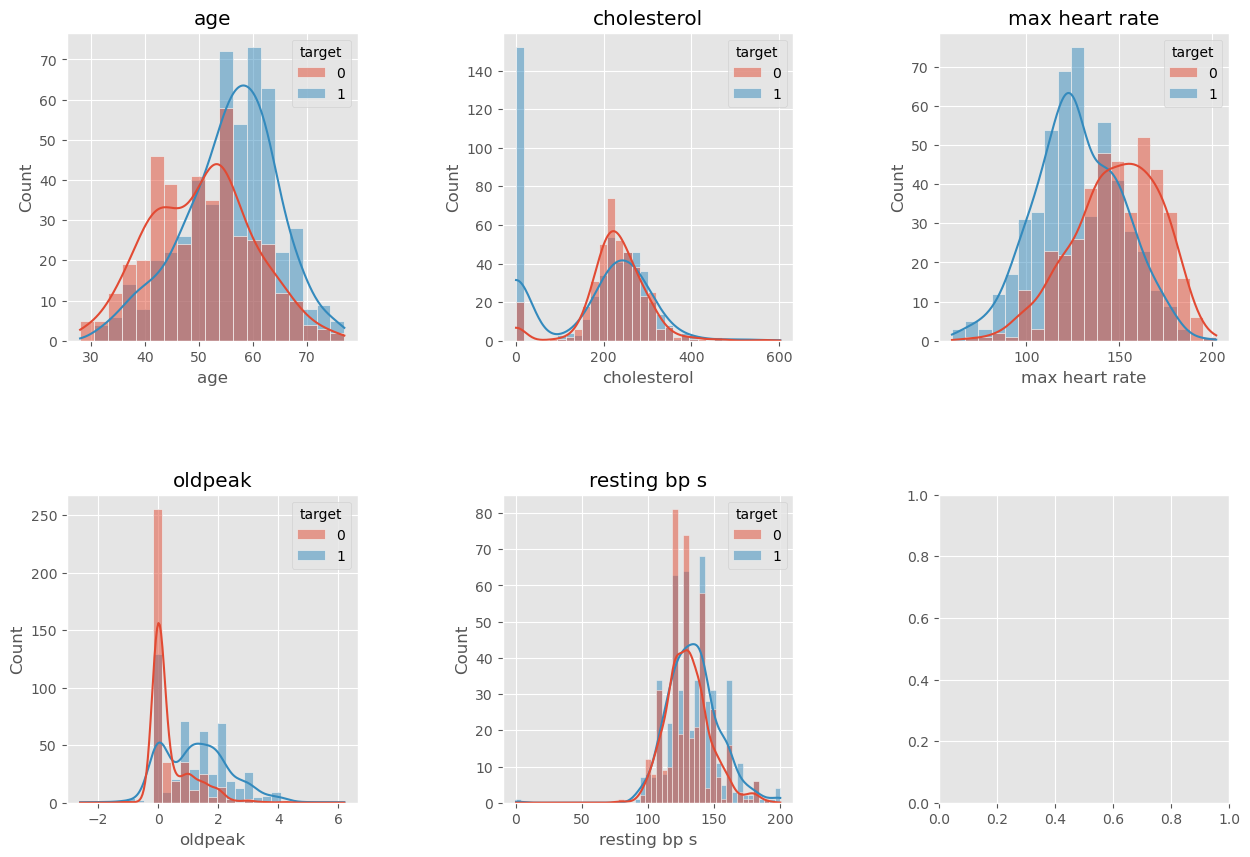

In [8]:
# Lets distribution plot from the continious data
# Which include Age, Cholestrol,max heart rate,oldpeak,resting bp s
continious_columns = ['age','cholesterol','max heart rate','oldpeak','resting bp s']
rows = (len(continious_columns) + 1 )//3 

columns = 3
fig,axes = plt.subplots(rows,columns,figsize=(15,5*rows))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.flatten()
for i,col in enumerate(continious_columns):
    sns.histplot(df,x=str(col),ax=axes[i],kde=True,hue='target')
    axes[i].set_title(col)
    



Based on the **visualization**, we can draw the following conclusions:

1. The majority of individuals with heart disease are in the age range of 50-60 years old.
2. Individuals with heart disease tend to have lower cholesterol levels.
3. Most individuals with heart disease exhibit a maximum heart rate between 120 and 130 beats per minute.

Please note that these conclusions are based on the visual analysis of the data, and it's always important to validate them using appropriate statistical methods or consult domain experts if necessary.

In [9]:
# Now look into the categorical data type
# Which include sex,chest pain type,fasting blood sugar, exercise angina,resting ecg,ST slop

<Axes: xlabel='sex', ylabel='count'>

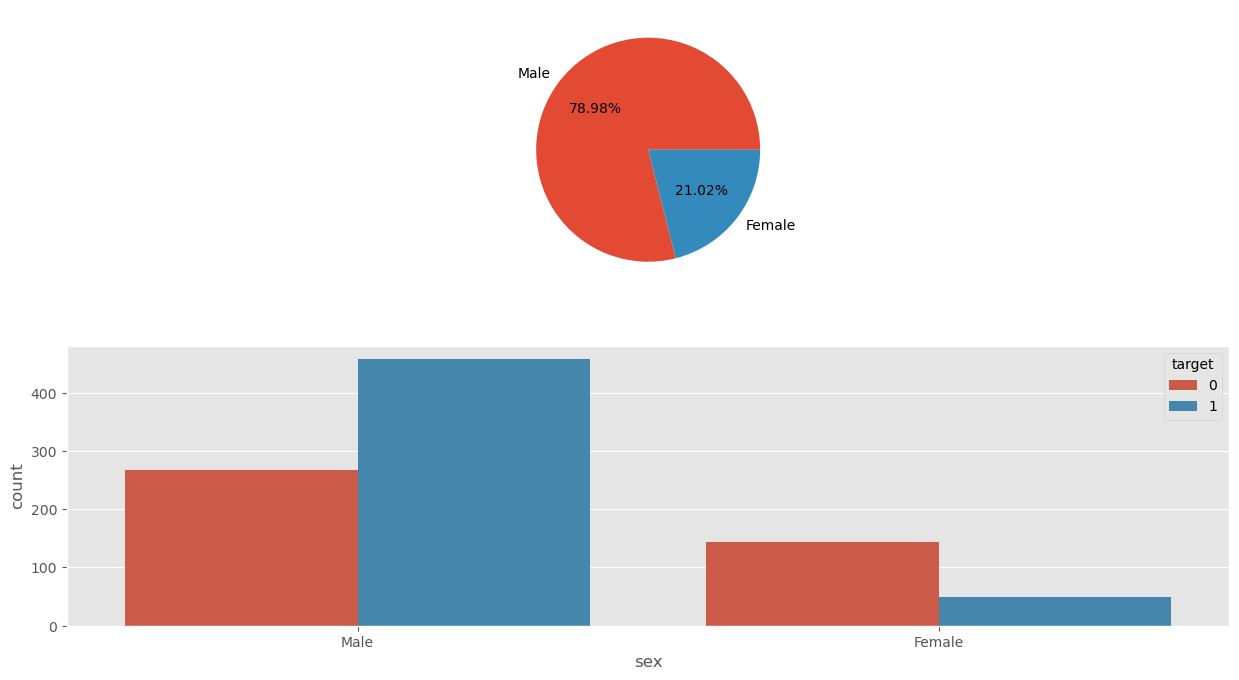

In [10]:
# Sex
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(15,8))
df_sex = df['sex'].copy()
df_sex = df_sex.map(lambda x : 'Male' if x == 1 else 'Female')

sex = df_sex.value_counts()
ax1.pie(sex,labels=sex.index,autopct='%.2f%%')
df_sex2 = df.copy()
df_sex2['sex'] = df_sex2['sex'].map(lambda x : 'Male' if x == 1 else 'Female')
sns.countplot(df_sex2,x='sex',hue='target',ax=ax2)

Based on the **visualization**, we can draw the following conclusions:

- Most likely man are positive rather than female

<Axes: xlabel='fasting blood sugar', ylabel='count'>

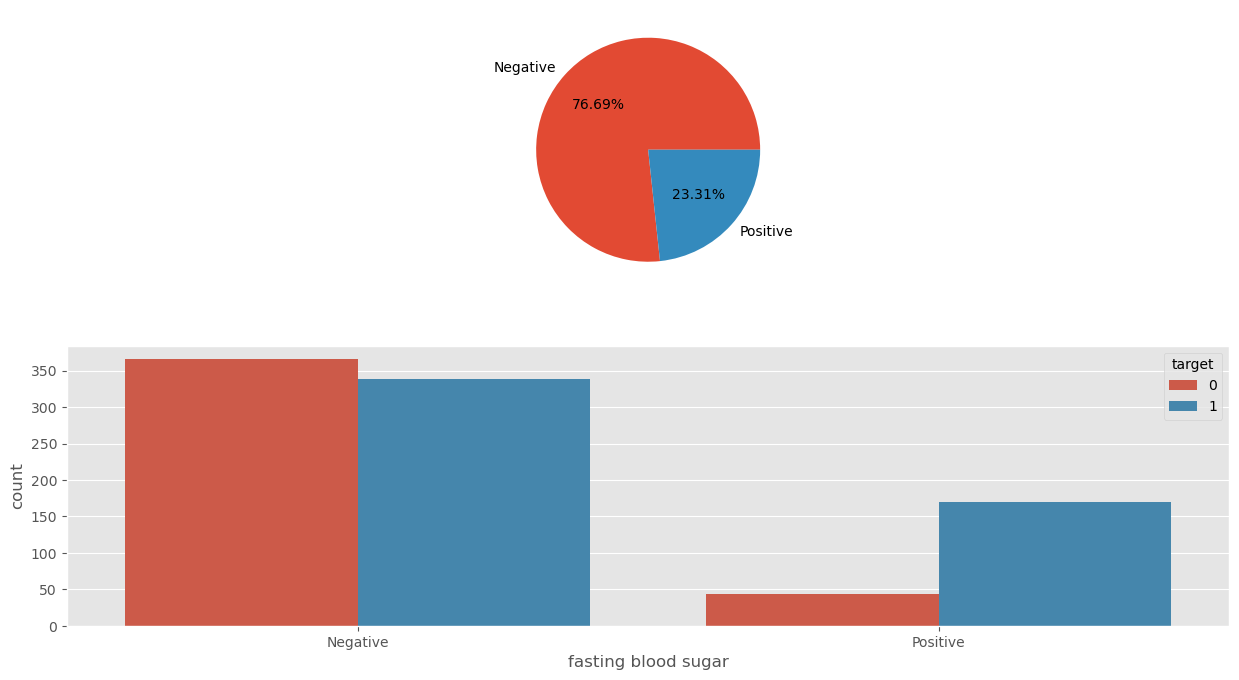

In [11]:
# Fasting blood sugar

fig,[ax1,ax2] = plt.subplots(2,1,figsize=(15,8))
df_sugar = df['fasting blood sugar'].copy()
df_sugar = df_sugar.map(lambda x : 'Positive' if x == 1 else 'Negative')

sugar = df_sugar.value_counts()
ax1.pie(sugar,labels=sugar.index,autopct='%.2f%%')
df_sugar2 = df.copy()
df_sugar2['fasting blood sugar'] = df_sex2['fasting blood sugar'].map(lambda x : 'Positive' if x == 1 else 'Negative')
sns.countplot(df_sugar2,x='fasting blood sugar',hue='target',ax=ax2)

Based on the **visualization**, we can draw the following conclusions:

- People that with fasting blood sugar are highly to have heart disease

# Modelling

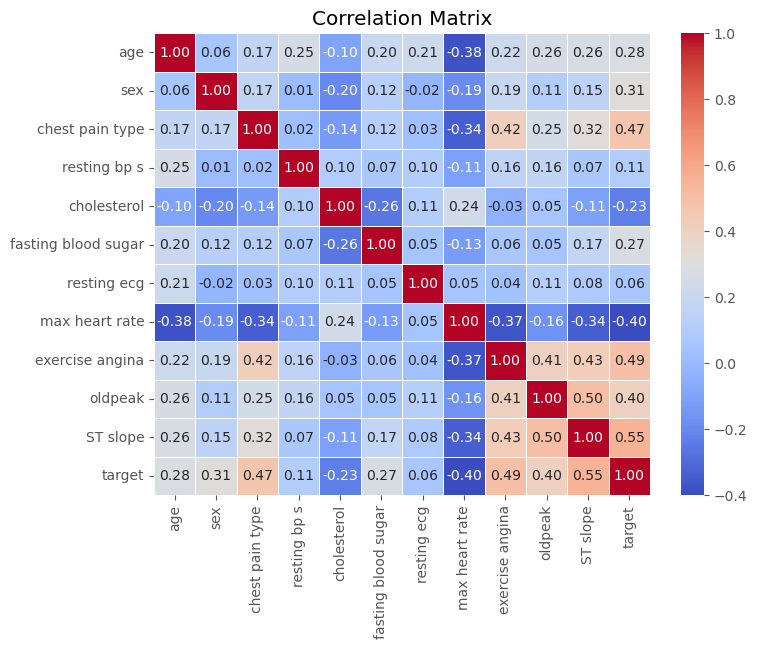

In [12]:
# Let's take a look for the features correlation.
corr = df.corr()

# Set the figure size
plt.figure(figsize=(8, 6))

sns.heatmap(corr,fmt='.2f',annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [13]:
# Spliting the data for train,test and validation
X = df.drop(columns=['target']).values
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=42)


In [14]:
# Metrics of evaluation -> Accuracy Score
def classification_metrics(y_test,y_pred):
    print("Acc:\t",round( accuracy_score(y_test,y_pred),4))
    return round(  accuracy_score(y_test,y_pred),4)

In [15]:
def model_evaluate(model, param_grid, x_train, y_train, x_test,y_test, model_name, k_folds=4, scoring='accuracy', fit_parameters={}):
#     Using grid search to find most suitable parameter
    model_cv = GridSearchCV(model, param_grid, cv=k_folds, verbose=False, scoring= scoring)
    model_cv.fit(x_train, y_train, **fit_parameters)
    y_train_pred = model_cv.predict(x_train)
    y_test_pred = model_cv.predict(x_test)

    print("Training metrics:")
    classification_metrics(y_train ,y_train_pred)
    print("\nTesting metrics:")
    classification_metrics(y_test ,y_test_pred)
    
    print('best parameters')
    print (model_cv.best_params_)

    best_model = model_cv.best_estimator_
    
    return best_model

## XgBoost

In [16]:
# If you want to run fully the grid search 
# xgb_parameters = {
#     'booster': ['gbtree'],
#     'tree_method': ['hist'],
#     'gamma': [0.1, 0.5, 1.0],
#     'reg_alpha': [0.0, 0.5, 1.0],
#     'eta': [0.01, 0.03, 0.05],
#     'reg_lambda': [0.00001, 0.0001, 0.001],
#     'colsample_bytree': [0.6, 0.75, 0.9],
#     'min_child_weight': [20, 40, 60],
#     'n_estimators': [500, 1000, 1500],
#     'seed': [42],
#     'max_depth': [5, 7, 9],
# }
# Best parameters
xgb_parameters = {'booster': ['gbtree'],
 'colsample_bytree': [0.75], 
 'eta': [0.01], 'gamma': [0.5], 
 'max_depth': [5], 
 'min_child_weight': [20], 
 'n_estimators': [1000], 
 'reg_alpha': [0.5], 
 'reg_lambda': [0.001],
 'seed': [42],
 'tree_method': ['hist']}

xgb_model = xgb.XGBClassifier()
model = model_evaluate(xgb_model, xgb_parameters, X_train, y_train, X_test, y_test, 'XGB',
                           fit_parameters={'eval_set':[(X_val, y_val)], 
                                           'early_stopping_rounds':100,'verbose':0,'eval_metric':'auc'})


Training metrics:
Acc:	 0.833

Testing metrics:
Acc:	 0.8188
best parameters
{'booster': 'gbtree', 'colsample_bytree': 0.75, 'eta': 0.01, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 20, 'n_estimators': 1000, 'reg_alpha': 0.5, 'reg_lambda': 0.001, 'seed': 42, 'tree_method': 'hist'}


In [17]:
# Lets check another model evaluation metrics
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80       132
           1       0.79      0.90      0.84       144

    accuracy                           0.82       276
   macro avg       0.83      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



<Axes: xlabel='Importance', ylabel='Feature'>

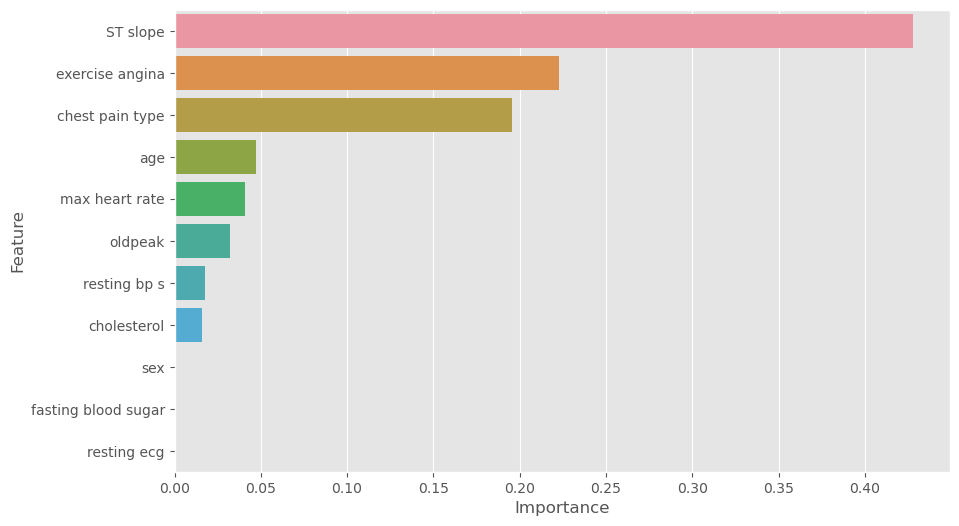

In [18]:
# Feature importance
importance_scores = model.feature_importances_

# Create a sorted list of feature names and their importance scores
feature_importance = zip(df.drop(columns=['target']).columns, importance_scores)

df_importance = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])

# Plot feature importance
plt.figure(figsize=(10, 6))
df_importance = df_importance.sort_values('Importance',ascending=False)
sns.barplot(df_importance,y='Feature',x='Importance')

## You can consider excluding the columns 'sex', 'fasting blood sugar', and 'resting ecg' from the training based on their feature importance. It would be interesting to observe the results when you perform the training without these columns. Feel free to explore and evaluate the outcomes for yourself!

In [19]:
# Spliting the data for train,test and validation
X = df.drop(columns=['target','sex','fasting blood sugar','resting ecg']).values
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=42)


## Thank You for Your Support!

Dear Kaggle Community,

I want to express my heartfelt thanks to all of you who have taken the time to explore my notebook. As a beginner in this field, I greatly appreciate your time and engagement.

This notebook represents my efforts to delve into data analysis and machine learning. It has been a valuable learning experience for me, and I hope you found it helpful too.

If you found my notebook useful or interesting, I kindly ask for your support by giving it an upvote. Your feedback and recognition are highly appreciated and inspire me to continue sharing my knowledge with the community.

I am open to any suggestions, feedback, or discussions regarding the notebook. Please feel free to leave your comments, questions, or ideas in the comment section. Together, we can learn and grow in this exciting field.

Once again, thank you for being a part of my learning journey. Your engagement and support mean a lot to me.

Happy exploring and happy coding!😃

Best regards,

**Muladi**
